<a href="https://colab.research.google.com/github/chandana171/dafe/blob/main/Copy_of_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network To Determine Depression

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Deppression.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[6.1900000e+02 1.0000000e+00 4.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 4.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 1.0000000e+00 4.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 1.0000000e+00 4.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 3.0000000e+00 2.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 1.0000000e+00 4.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[6.1900000e+02 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 1.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 3.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.6196 - accuracy: 0.6798
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4786 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4498 - accuracy: 0.7962
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4371 - accuracy: 0.8021
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4255 - accuracy: 0.8096
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4111 - accuracy: 0.8195
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3958 - accuracy: 0.8341
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3803 - accuracy: 0.8425
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8460
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3621 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the given individual would be deppressed or not:

Geography: France

Social Media Follower/Friends: 600

Gender: Male

Age: 40 years old

No. of Days Spent outdoors/10days: 3

Assets/Financial Strength: \$ 60000

Number of Family Members in contact with: 2

Does this customer have a Partner? Yes

Is this person endrolled in Therapy? : Yes

Estimated Salary: \$ 50000



**Solution**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 97ms/step
[[False]]


Therefore, our ANN model predicts that this person's state of mind:

Since the output is 1(False), it shows us the person is not depressed!

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_pred,y_test))


Accuracy :  0.859


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   78]
 [ 204  201]]


0.859

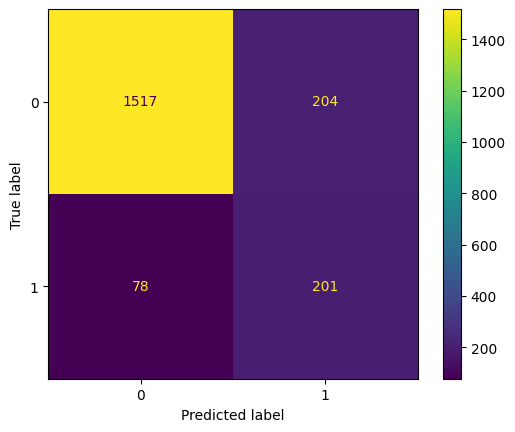

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_pred,y_test)
d=ConfusionMatrixDisplay(cm).plot()